In [37]:
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.model_selection import train_test_split

In [38]:
#import all the results from sense polar classifier
res1=pd.read_csv(r'res1.csv')
res2=pd.read_csv(r'res2.csv')
res3=pd.read_csv(r'res3.csv')
res4=pd.read_csv(r'res4.csv')
res5=pd.read_csv(r'res5.csv')

In [39]:
results=pd.concat([res1,res2,res3,res4,res5], ignore_index=True)

In [40]:
results=results.drop(['Unnamed: 0','Results'],axis=1)

In [41]:
results

,sentece,sense_polar,Truth
0,[CLS] Jean Dujardin gets Connery's mannerisms ...,0.074306,0
1,[CLS] I have seen so many bad reviews on Super...,-0.474031,0
2,[CLS] Looking backwards to that year 2002 when...,-0.785372,0
3,[CLS] THE CELL (2000) Rating: 8/10<br /><br />...,-0.849014,0
4,[CLS] I loved this movie! It was all I could d...,-1.056743,0
...,...,...,...
2495,[CLS] When Carol (Vanessa Hidalgo) starts look...,-0.189443,1
2496,[CLS] I had a hard time staying awake for the ...,0.332564,1
2497,"[CLS] This movie was so badly written, directe...",0.203301,1
2498,[CLS] When I was a younger(oh about 2)I watche...,-0.436236,1


In [42]:

x=results['sense_polar']
y=results['Truth']

In [43]:
#train test split
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.33, random_state=42)

In [44]:
X_train

308    -0.721647
604    -0.339460
2154   -0.311586
2259    0.320203
59     -0.825208
          ...   
1638   -0.033473
1095   -0.341060
1130   -0.200794
1294    0.669368
860    -0.285734
Name: sense_polar, Length: 1675, dtype: float64

In [45]:
y_train

308     1
604     0
2154    0
2259    1
59      0
       ..
1638    0
1095    0
1130    0
1294    1
860     1
Name: Truth, Length: 1675, dtype: int64

In [46]:
# to make easier further analysis join all train data in one dataframe
train=pd.DataFrame()
train['sense_polar']=X_train
train['Truth']=y_train
train=train.reset_index()

In [47]:
train

,index,sense_polar,Truth
0,308,-0.721647,1
1,604,-0.339460,0
2,2154,-0.311586,0
3,2259,0.320203,1
4,59,-0.825208,0
...,...,...,...
1670,1638,-0.033473,0
1671,1095,-0.341060,0
1672,1130,-0.200794,0
1673,1294,0.669368,1


In [48]:
#the below function return the number of correct prediction based on a breakpoint
def dictionary_correct_values(dataframe,break_point):
    res=[]
    for value in  dataframe['sense_polar']:
        if value < break_point:
            res.append(0)
        else :
            res.append(1)

    dataframe=dataframe.assign(Results= res)
    same_values=0
    for index in range(len( dataframe['Truth'])):
        if(dataframe['Truth'][index]==dataframe['Results'][index]):
            same_values+=1
            
        
        
    
    return same_values


In [49]:
bp=-0.3 
res_dict=defaultdict()
while bp<0.3:
    res_dict[bp]=dictionary_correct_values(train,bp)
    bp+=0.001
    
res_dict

defaultdict(None,
            {-0.3: 1130,
             -0.299: 1130,
             -0.298: 1131,
             -0.297: 1132,
             -0.296: 1132,
             -0.295: 1132,
             -0.294: 1132,
             -0.293: 1130,
             -0.292: 1128,
             -0.291: 1126,
             -0.29: 1127,
             -0.289: 1128,
             -0.288: 1131,
             -0.287: 1130,
             -0.286: 1131,
             -0.285: 1130,
             -0.284: 1131,
             -0.283: 1129,
             -0.282: 1129,
             -0.28099999999999997: 1127,
             -0.27999999999999997: 1127,
             -0.27899999999999997: 1128,
             -0.27799999999999997: 1128,
             -0.27699999999999997: 1128,
             -0.27599999999999997: 1129,
             -0.27499999999999997: 1129,
             -0.27399999999999997: 1132,
             -0.27299999999999996: 1133,
             -0.27199999999999996: 1132,
             -0.27099999999999996: 1133,
             -0.26999

In [50]:
break_point = max(res_dict, key=res_dict.get)
#find the best breakpoint
break_point

-0.25899999999999995

In [51]:
#create the dataframe to be used in confusion matrix
def create_df_for_cm(dataframe,break_point):
    res=[]
    for value in  dataframe['sense_polar']:
        if value < break_point:
            res.append(0)
        else :
            res.append(1)

    dataframe=dataframe.assign(Results= res)
    
    return dataframe

In [52]:
def confusion_matrix(df):
    import matplotlib.pyplot as plt
    import numpy
    from sklearn import metrics
    
    actual = df.Truth
    predicted =  df.Results

    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    return plt.show()

In [53]:
#join the test data together
test=pd.DataFrame()
test['sense_polar']=X_test
test['Truth']=y_test
test=test.reset_index()

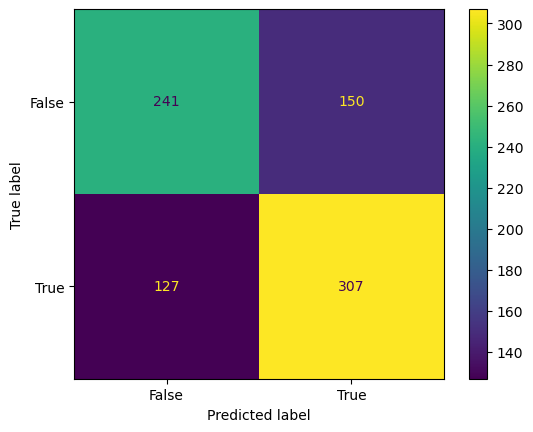

In [54]:
#test set with the optimal break point
confusion_matrix(create_df_for_cm(test,break_point))

In [55]:
from sklearn.metrics import accuracy_score, precision_score, f1_score,recall_score
test_data_results_optimal_breakpoint=create_df_for_cm(test,break_point)


print("Accuracy of test data = {}".format(accuracy_score(test_data_results_optimal_breakpoint.Truth, test_data_results_optimal_breakpoint.Results)))
print("Precisison of test data = {}".format(precision_score(test_data_results_optimal_breakpoint.Truth, test_data_results_optimal_breakpoint.Results)))
print("F1 of test data = {}".format(f1_score(test_data_results_optimal_breakpoint.Truth, test_data_results_optimal_breakpoint.Results)))
print("Recall of test data = {}".format(recall_score(test_data_results_optimal_breakpoint.Truth, test_data_results_optimal_breakpoint.Results)))

Accuracy of test data = 0.6642424242424242
Precisison of test data = 0.6717724288840262
F1 of test data = 0.6891133557800224
Recall of test data = 0.7073732718894009


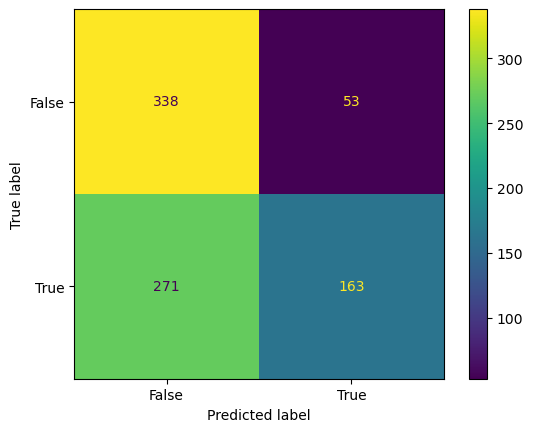

Accuracy of test data = 0.6072727272727273
Precisison of test data = 0.7546296296296297
F1 of test data = 0.5015384615384615
Recall of test data = 0.37557603686635943


In [56]:
#check the results using breakpoint 0

confusion_matrix(create_df_for_cm(test,0))

test_data_results_breakpoint_0=create_df_for_cm(test,0)


print("Accuracy of test data = {}".format(accuracy_score(test_data_results_breakpoint_0.Truth, test_data_results_breakpoint_0.Results)))
print("Precisison of test data = {}".format(precision_score(test_data_results_breakpoint_0.Truth, test_data_results_breakpoint_0.Results)))
print("F1 of test data = {}".format(f1_score(test_data_results_breakpoint_0.Truth, test_data_results_breakpoint_0.Results)))
print("Recall of test data = {}".format(recall_score(test_data_results_breakpoint_0.Truth, test_data_results_breakpoint_0.Results)))

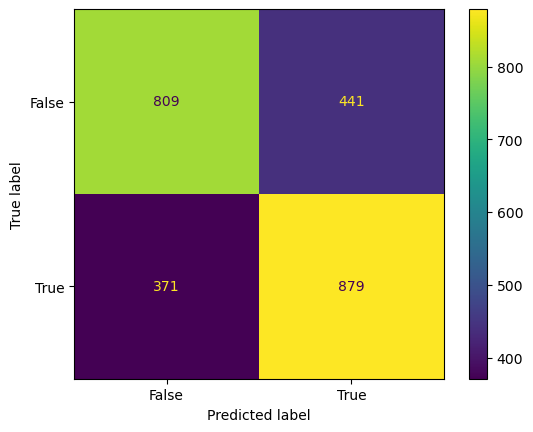

Accuracy of test data = 0.6752
Precisison of test data = 0.6659090909090909
F1 of test data = 0.684046692607004
Recall of test data = 0.7032


In [57]:
#check the results for the whole dataset
#optimal breakpoint
confusion_matrix(create_df_for_cm(results,break_point))
data_results_optimal_breakpoint=create_df_for_cm(results,break_point)

print("Accuracy of test data = {}".format(accuracy_score(data_results_optimal_breakpoint.Truth, data_results_optimal_breakpoint.Results)))
print("Precisison of test data = {}".format(precision_score(data_results_optimal_breakpoint.Truth, data_results_optimal_breakpoint.Results)))
print("F1 of test data = {}".format(f1_score(data_results_optimal_breakpoint.Truth, data_results_optimal_breakpoint.Results)))
print("Recall of test data = {}".format(recall_score(data_results_optimal_breakpoint.Truth, data_results_optimal_breakpoint.Results)))

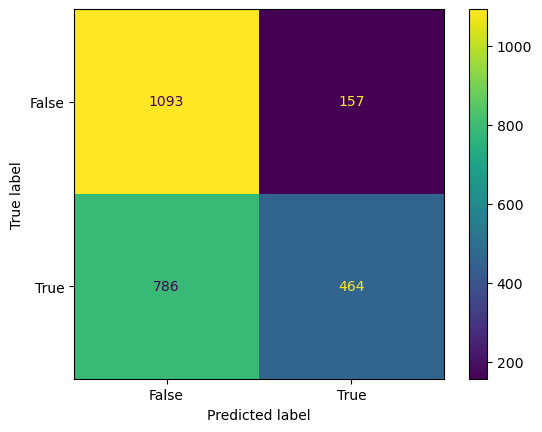

Accuracy of test data = 0.6228
Precisison of test data = 0.7471819645732689
F1 of test data = 0.495991448423303
Recall of test data = 0.3712


In [58]:
#breakpoint =0
confusion_matrix(create_df_for_cm(results,0))
data_results_breakpoint_0=create_df_for_cm(results,0)

print("Accuracy of test data = {}".format(accuracy_score(data_results_breakpoint_0.Truth, data_results_breakpoint_0.Results)))
print("Precisison of test data = {}".format(precision_score(data_results_breakpoint_0.Truth, data_results_breakpoint_0.Results)))
print("F1 of test data = {}".format(f1_score(data_results_breakpoint_0.Truth, data_results_breakpoint_0.Results)))
print("Recall of test data = {}".format(recall_score(data_results_breakpoint_0.Truth, data_results_breakpoint_0.Results)))

# breakpoint analysis for 5 examples

In [59]:
res1=pd.read_csv(r'5_examples_res1.csv')
res2=pd.read_csv(r'5_examples_res2.csv')
res3=pd.read_csv(r'5_examples_res3.csv')
res4=pd.read_csv(r'5_examples_res4.csv')
res5=pd.read_csv(r'5_examples_res5.csv')

In [60]:
results=pd.concat([res1,res2,res3,res4,res5], ignore_index=True)
results

,Unnamed: 0,sentece,sense_polar,Results,Truth
0,0,[CLS] One of the other reviewers has mentioned...,-0.291215,0,0
1,1,[CLS] A wonderful little production. <br /><br...,-0.981138,0,0
2,2,[CLS] I thought this was a wonderful way to sp...,-0.712440,0,0
3,3,"[CLS] Petter Mattei's ""Love in the Time of Mon...",-0.472766,0,0
4,4,"[CLS] Probably my all-time favorite movie, a s...",-0.508796,0,0
...,...,...,...,...,...
2495,495,[CLS] Why is it that when a star reaches the t...,-0.119708,0,1
2496,496,"[CLS] OK, before I get into this, let's go ahe...",-0.274874,0,1
2497,497,"[CLS] Oh wow, the character shares my name fir...",-0.187722,0,1
2498,498,[CLS] You know you're in trouble when the film...,0.323598,1,1


In [61]:
x=results['sense_polar']
y=results['Truth']

In [62]:
#train test split
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.33, random_state=42)

# to make easier further analysis join all train data in one dataframe
train=pd.DataFrame()
train['sense_polar']=X_train
train['Truth']=y_train
train=train.reset_index()


#join the test data together
test=pd.DataFrame()
test['sense_polar']=X_test
test['Truth']=y_test
test=test.reset_index()

In [63]:
bp=-0.5 
res_dict=defaultdict()
while bp<0.3:
    res_dict[bp]=dictionary_correct_values(train,bp)
    bp+=0.001
    
res_dict

defaultdict(None,
            {-0.5: 1088,
             -0.499: 1088,
             -0.498: 1089,
             -0.497: 1086,
             -0.496: 1087,
             -0.495: 1088,
             -0.494: 1089,
             -0.493: 1089,
             -0.492: 1091,
             -0.491: 1092,
             -0.49: 1093,
             -0.489: 1094,
             -0.488: 1095,
             -0.487: 1096,
             -0.486: 1097,
             -0.485: 1098,
             -0.484: 1098,
             -0.483: 1100,
             -0.482: 1100,
             -0.481: 1102,
             -0.48: 1101,
             -0.479: 1102,
             -0.478: 1103,
             -0.477: 1101,
             -0.476: 1104,
             -0.475: 1106,
             -0.474: 1106,
             -0.473: 1108,
             -0.472: 1110,
             -0.471: 1111,
             -0.47: 1113,
             -0.469: 1111,
             -0.46799999999999997: 1109,
             -0.46699999999999997: 1109,
             -0.46599999999999997: 1111,


In [64]:
break_point = max(res_dict, key=res_dict.get)
#find the best breakpoint
break_point

-0.2829999999999998

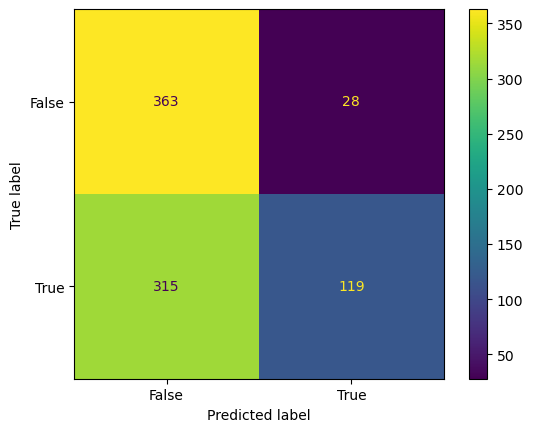

Accuracy of test data = 0.5842424242424242
Precisison of test data = 0.8095238095238095
F1 of test data = 0.4096385542168674
Recall of test data = 0.27419354838709675


In [65]:
#check the results using breakpoint 0
confusion_matrix(create_df_for_cm(test,0))

test_data_results_breakpoint_0=create_df_for_cm(test,0)


print("Accuracy of test data = {}".format(accuracy_score(test_data_results_breakpoint_0.Truth, test_data_results_breakpoint_0.Results)))
print("Precisison of test data = {}".format(precision_score(test_data_results_breakpoint_0.Truth, test_data_results_breakpoint_0.Results)))
print("F1 of test data = {}".format(f1_score(test_data_results_breakpoint_0.Truth, test_data_results_breakpoint_0.Results)))
print("Recall of test data = {}".format(recall_score(test_data_results_breakpoint_0.Truth, test_data_results_breakpoint_0.Results)))

In [66]:
#optimal breakpoint
test_data_results_optimal_breakpoint=create_df_for_cm(test,break_point)


print("Accuracy of test data = {}".format(accuracy_score(test_data_results_optimal_breakpoint.Truth, test_data_results_optimal_breakpoint.Results)))
print("Precisison of test data = {}".format(precision_score(test_data_results_optimal_breakpoint.Truth, test_data_results_optimal_breakpoint.Results)))
print("F1 of test data = {}".format(f1_score(test_data_results_optimal_breakpoint.Truth, test_data_results_optimal_breakpoint.Results)))
print("Recall of test data = {}".format(recall_score(test_data_results_optimal_breakpoint.Truth, test_data_results_optimal_breakpoint.Results)))

Accuracy of test data = 0.6872727272727273
Precisison of test data = 0.705607476635514
F1 of test data = 0.7006960556844548
Recall of test data = 0.695852534562212


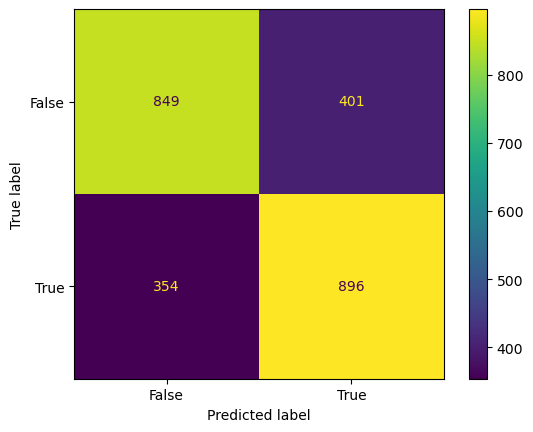

Accuracy of test data = 0.698
Precisison of test data = 0.6908249807247494
F1 of test data = 0.7035728307813113
Recall of test data = 0.7168


In [67]:
#check the results for the whole dataset
#optimal breakpoint
confusion_matrix(create_df_for_cm(results,break_point))
data_results_optimal_breakpoint=create_df_for_cm(results,break_point)

print("Accuracy of test data = {}".format(accuracy_score(data_results_optimal_breakpoint.Truth, data_results_optimal_breakpoint.Results)))
print("Precisison of test data = {}".format(precision_score(data_results_optimal_breakpoint.Truth, data_results_optimal_breakpoint.Results)))
print("F1 of test data = {}".format(f1_score(data_results_optimal_breakpoint.Truth, data_results_optimal_breakpoint.Results)))
print("Recall of test data = {}".format(recall_score(data_results_optimal_breakpoint.Truth, data_results_optimal_breakpoint.Results)))

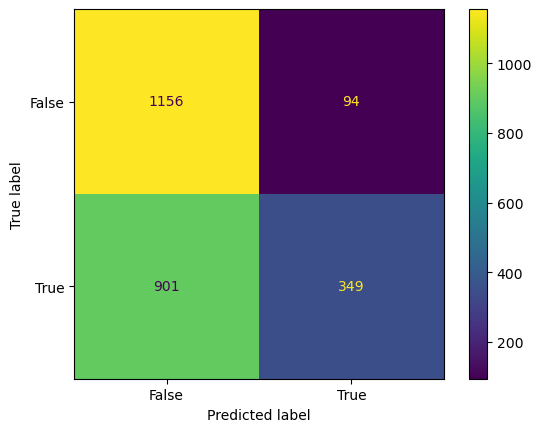

Accuracy of test data = 0.602
Precisison of test data = 0.7878103837471784
F1 of test data = 0.41228588304784414
Recall of test data = 0.2792


In [68]:
#breakpoint =0
confusion_matrix(create_df_for_cm(results,0))
data_results_breakpoint_0=create_df_for_cm(results,0)

print("Accuracy of test data = {}".format(accuracy_score(data_results_breakpoint_0.Truth, data_results_breakpoint_0.Results)))
print("Precisison of test data = {}".format(precision_score(data_results_breakpoint_0.Truth, data_results_breakpoint_0.Results)))
print("F1 of test data = {}".format(f1_score(data_results_breakpoint_0.Truth, data_results_breakpoint_0.Results)))
print("Recall of test data = {}".format(recall_score(data_results_breakpoint_0.Truth, data_results_breakpoint_0.Results)))

#  30 examples

In [69]:
res1=pd.read_csv(r'30_examples_res1.csv')
res2=pd.read_csv(r'30_examples_res2.csv')
res3=pd.read_csv(r'30_examples_res3.csv')
res4=pd.read_csv(r'30_examples_res4.csv')
res5=pd.read_csv(r'30_examples_res5.csv')

In [70]:
results=pd.concat([res1,res2,res3,res4,res5], ignore_index=True)
results

,Unnamed: 0,sentece,sense_polar,Results,Truth
0,0,[CLS] One of the other reviewers has mentioned...,-0.436630,0,0
1,1,[CLS] A wonderful little production. <br /><br...,-0.890697,0,0
2,2,[CLS] I thought this was a wonderful way to sp...,-0.764404,0,0
3,3,"[CLS] Petter Mattei's ""Love in the Time of Mon...",-0.601375,0,0
4,4,"[CLS] Probably my all-time favorite movie, a s...",-0.646146,0,0
...,...,...,...,...,...
2495,495,[CLS] Why is it that when a star reaches the t...,-0.208998,0,1
2496,496,"[CLS] OK, before I get into this, let's go ahe...",-0.285242,0,1
2497,497,"[CLS] Oh wow, the character shares my name fir...",-0.426626,0,1
2498,498,[CLS] You know you're in trouble when the film...,0.125672,1,1


In [71]:
x=results['sense_polar']
y=results['Truth']

#train test split
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.33, random_state=42)

# to make easier further analysis join all train data in one dataframe
train=pd.DataFrame()
train['sense_polar']=X_train
train['Truth']=y_train
train=train.reset_index()


#join the test data together
test=pd.DataFrame()
test['sense_polar']=X_test
test['Truth']=y_test
test=test.reset_index()

In [72]:
bp=-0.5 
res_dict=defaultdict()
while bp<0.3:
    res_dict[bp]=dictionary_correct_values(train,bp)
    bp+=0.001
    
res_dict

defaultdict(None,
            {-0.5: 1140,
             -0.499: 1141,
             -0.498: 1143,
             -0.497: 1145,
             -0.496: 1145,
             -0.495: 1145,
             -0.494: 1147,
             -0.493: 1148,
             -0.492: 1150,
             -0.491: 1149,
             -0.49: 1149,
             -0.489: 1151,
             -0.488: 1152,
             -0.487: 1153,
             -0.486: 1153,
             -0.485: 1153,
             -0.484: 1153,
             -0.483: 1154,
             -0.482: 1155,
             -0.481: 1155,
             -0.48: 1156,
             -0.479: 1158,
             -0.478: 1161,
             -0.477: 1161,
             -0.476: 1161,
             -0.475: 1162,
             -0.474: 1165,
             -0.473: 1168,
             -0.472: 1168,
             -0.471: 1168,
             -0.47: 1169,
             -0.469: 1170,
             -0.46799999999999997: 1169,
             -0.46699999999999997: 1169,
             -0.46599999999999997: 1171,


In [73]:
break_point = max(res_dict, key=res_dict.get)
#find the best breakpoint
break_point

-0.4109999999999999

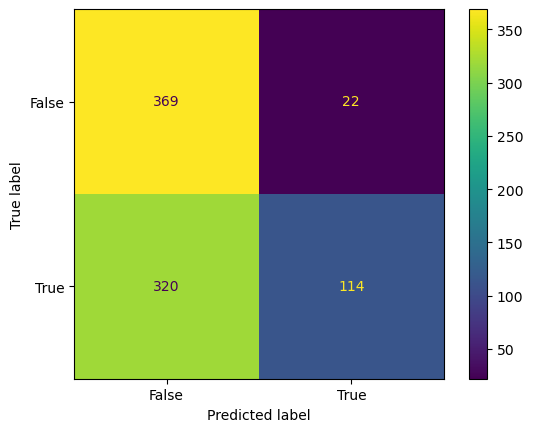

Accuracy of test data = 0.5854545454545454
Precisison of test data = 0.8382352941176471
F1 of test data = 0.39999999999999997
Recall of test data = 0.2626728110599078


In [74]:
#check the results using breakpoint 0
confusion_matrix(create_df_for_cm(test,0))

test_data_results_breakpoint_0=create_df_for_cm(test,0)


print("Accuracy of test data = {}".format(accuracy_score(test_data_results_breakpoint_0.Truth, test_data_results_breakpoint_0.Results)))
print("Precisison of test data = {}".format(precision_score(test_data_results_breakpoint_0.Truth, test_data_results_breakpoint_0.Results)))
print("F1 of test data = {}".format(f1_score(test_data_results_breakpoint_0.Truth, test_data_results_breakpoint_0.Results)))
print("Recall of test data = {}".format(recall_score(test_data_results_breakpoint_0.Truth, test_data_results_breakpoint_0.Results)))

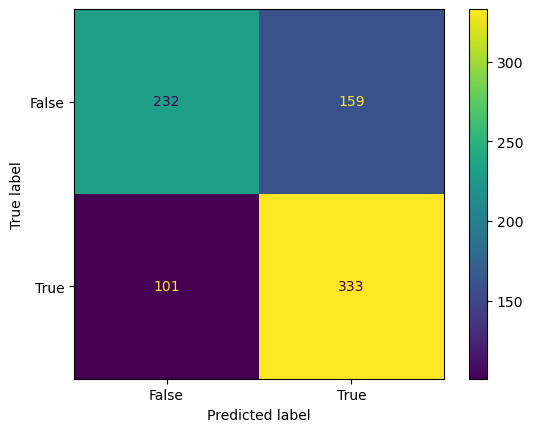

Accuracy of test data = 0.6848484848484848
Precisison of test data = 0.676829268292683
F1 of test data = 0.7192224622030238
Recall of test data = 0.7672811059907834


In [76]:
#optimal breakpoint
confusion_matrix(create_df_for_cm(test,break_point))
test_data_results_optimal_breakpoint=create_df_for_cm(test,break_point)

print("Accuracy of test data = {}".format(accuracy_score(test_data_results_optimal_breakpoint.Truth, test_data_results_optimal_breakpoint.Results)))
print("Precisison of test data = {}".format(precision_score(test_data_results_optimal_breakpoint.Truth, test_data_results_optimal_breakpoint.Results)))
print("F1 of test data = {}".format(f1_score(test_data_results_optimal_breakpoint.Truth, test_data_results_optimal_breakpoint.Results)))
print("Recall of test data = {}".format(recall_score(test_data_results_optimal_breakpoint.Truth, test_data_results_optimal_breakpoint.Results)))

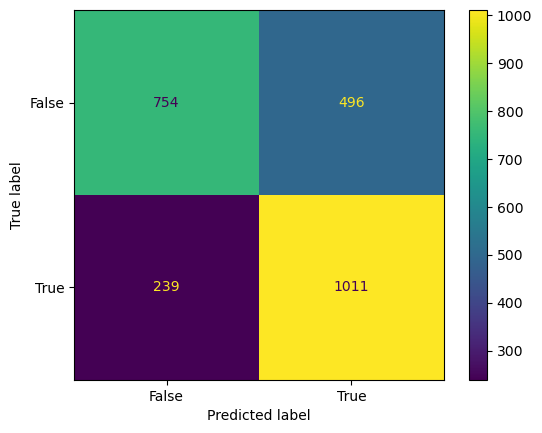

Accuracy of test data = 0.706
Precisison of test data = 0.6708692767086928
F1 of test data = 0.7334058759521218
Recall of test data = 0.8088


In [77]:
#check the results for the whole dataset
#optimal breakpoint
confusion_matrix(create_df_for_cm(results,break_point))
data_results_optimal_breakpoint=create_df_for_cm(results,break_point)

print("Accuracy of test data = {}".format(accuracy_score(data_results_optimal_breakpoint.Truth, data_results_optimal_breakpoint.Results)))
print("Precisison of test data = {}".format(precision_score(data_results_optimal_breakpoint.Truth, data_results_optimal_breakpoint.Results)))
print("F1 of test data = {}".format(f1_score(data_results_optimal_breakpoint.Truth, data_results_optimal_breakpoint.Results)))
print("Recall of test data = {}".format(recall_score(data_results_optimal_breakpoint.Truth, data_results_optimal_breakpoint.Results)))

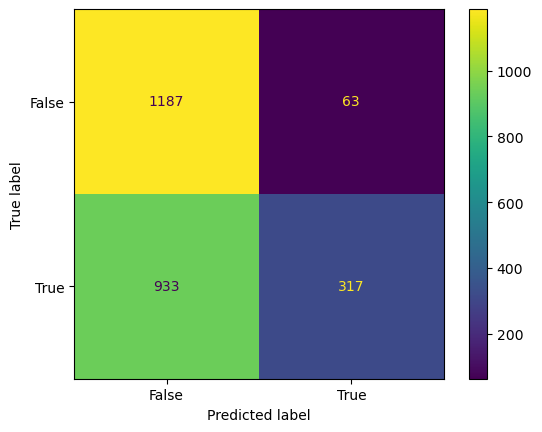

Accuracy of test data = 0.6016
Precisison of test data = 0.8342105263157895
F1 of test data = 0.3889570552147239
Recall of test data = 0.2536


In [78]:
#breakpoint =0
confusion_matrix(create_df_for_cm(results,0))
data_results_breakpoint_0=create_df_for_cm(results,0)

print("Accuracy of test data = {}".format(accuracy_score(data_results_breakpoint_0.Truth, data_results_breakpoint_0.Results)))
print("Precisison of test data = {}".format(precision_score(data_results_breakpoint_0.Truth, data_results_breakpoint_0.Results)))
print("F1 of test data = {}".format(f1_score(data_results_breakpoint_0.Truth, data_results_breakpoint_0.Results)))
print("Recall of test data = {}".format(recall_score(data_results_breakpoint_0.Truth, data_results_breakpoint_0.Results)))